NAME:Piriyadharshini N
ROLL NO:24BAD086
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column   

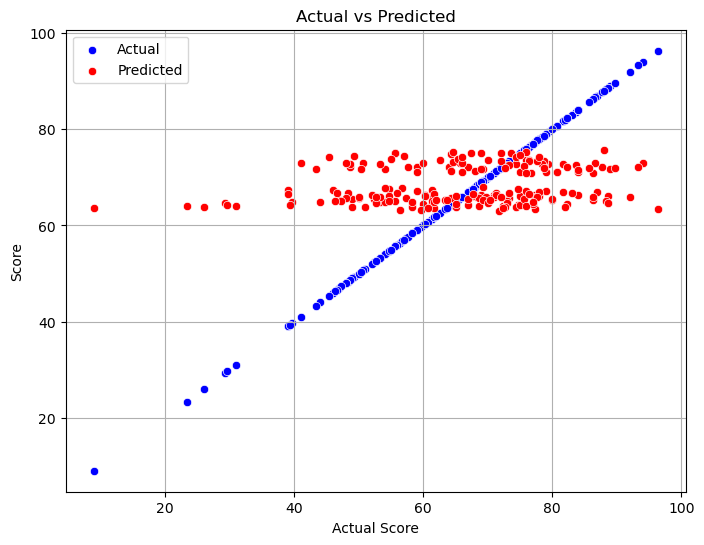

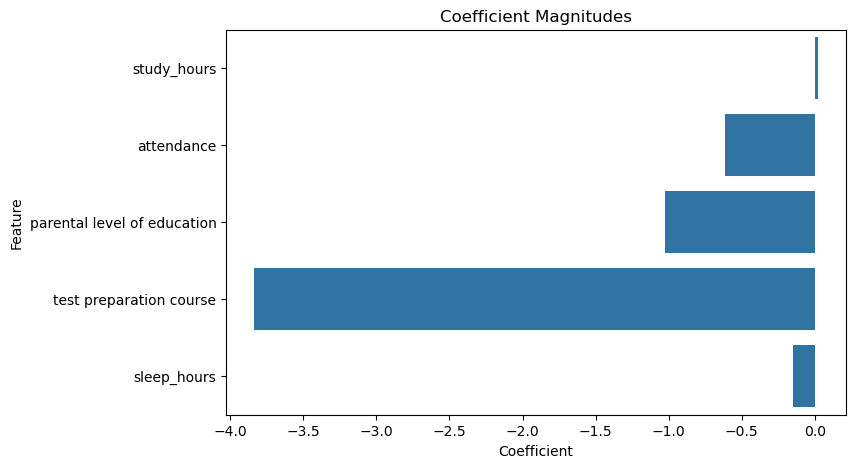

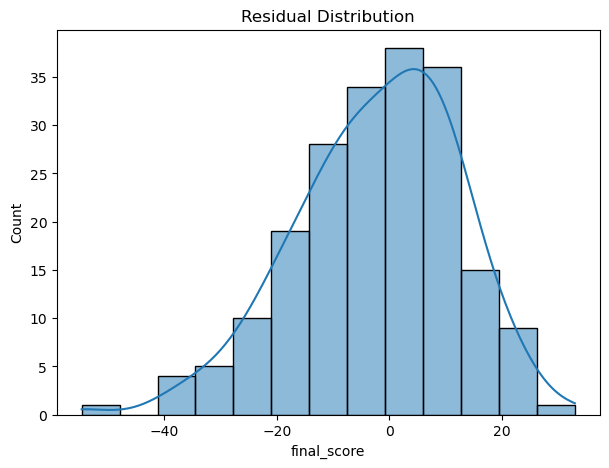

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
print("NAME:Piriyadharshini N\nROLL NO:24BAD086")
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())
print(df.info())

encoder = LabelEncoder()
df['test preparation course'] = encoder.fit_transform(
    df['test preparation course']
)

df['parental level of education'] = encoder.fit_transform(
    df['parental level of education']
)

np.random.seed(42)

df['study_hours'] = np.random.randint(1, 8, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(5, 9, size=len(df))

df['final_score'] = (
    df['math score'] +
    df['reading score'] +
    df['writing score']
) / 3

X = df[['study_hours',
        'attendance',
        'parental level of education',
        'test preparation course',
        'sleep_hours']]

y = df['final_score']
X = X.fillna(X.mean(numeric_only=True))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMULTILINEAR REGRESSION RESULTS")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)

coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nRegression Coefficients:")
print(coeff)

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

plot_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

plt.figure(figsize=(8,6))

sns.scatterplot(x="Actual",y="Actual",data=plot_df,label="Actual",color="blue")
sns.scatterplot(x="Actual",y="Predicted",data=plot_df,label="Predicted",color="red")

plt.xlabel("Actual Score")
plt.ylabel("Score")
plt.title("Actual vs Predicted")

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))

sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coeff
)

plt.title("Coefficient Magnitudes")
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(7,5))

sns.histplot(residuals, kde=True)

plt.title("Residual Distribution")

plt.show()


NAME:Piriyadharshini N
ROLL NO:24BAD086
POLYNOMIAL REGRESSION RESULTS
Degree 2
MSE: 18.41696779601779
RMSE: 4.291499481069267
R2: 0.6391701147013312
----------------------
Degree 3
MSE: 18.460267222224626
RMSE: 4.296541309265469
R2: 0.6383217814053861
----------------------
Degree 4
MSE: 18.268226874853166
RMSE: 4.274134634619406
R2: 0.642084284401658
----------------------


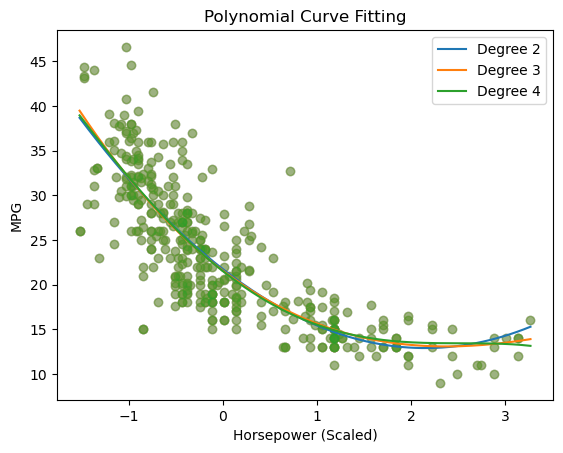

Ridge R2 Score: 0.6304712092659096


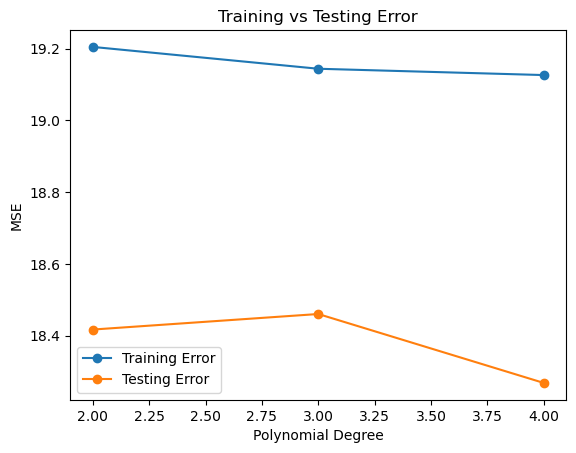

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
print("NAME:Piriyadharshini N\nROLL NO:24BAD086")
mpg = pd.read_csv("auto-mpg.csv")
mpg['horsepower'] = mpg['horsepower'].replace('?', np.nan)
mpg['horsepower'] = mpg['horsepower'].astype(float)

mpg = mpg.dropna()
# Feature and Target
X = mpg[['horsepower']]
y = mpg['mpg']
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Polynomial Models
degrees = [2, 3, 4]
train_errors = []
test_errors = []

print("POLYNOMIAL REGRESSION RESULTS")
plt.figure()

for d in degrees:

    poly = PolynomialFeatures(degree=d)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {d}")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    print("----------------------")

    train_pred = model.predict(X_train_poly)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mse)


    # Curve Plot
    X_plot = np.linspace(
        X_scaled.min(),
        X_scaled.max(),
        200
    ).reshape(-1, 1)

    X_plot_poly = poly.transform(X_plot)

    y_plot = model.predict(X_plot_poly)

    plt.scatter(X_scaled, y, alpha=0.3)
    plt.plot(X_plot, y_plot, label=f"Degree {d}")

plt.xlabel("Horsepower (Scaled)")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting")
plt.legend()
plt.show()

# Ridge Regression 
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge = Ridge(alpha=10)
ridge.fit(X_train_poly, y_train)
y_ridge = ridge.predict(X_test_poly)

print("Ridge R2 Score:", r2_score(y_test, y_ridge))
# Overfitting vs Underfitting
plt.figure()

plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, test_errors, marker='o', label="Testing Error")

plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()
